# Inspecting the dataset

Let's first load our challenge dataset. We will download the data from the Kaggle website and load it using a pandas dataframe:

In [5]:
import pandas as pd

loan_dataset = pd.read_csv("../datasets/loan_train.csv", index_col=0)
loan_dataset.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,1,0,MT04PA,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,True,MZ10CD
1,1,0,MT04PA,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,True,MZ10CD
2,1,0,MT04PA,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,True,MZ10CD
3,1,0,MT04PA,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,True,MZ10CD
4,1,0,MT04PA,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,True,MZ10CD


Let's inspect the columns of the dataset:

In [6]:
set(loan_dataset["occupation"])

{'MZ01CD', 'MZ10CD', 'MZ11CD'}

In [7]:
loan_dataset.columns

Index(['minority', 'sex', 'ZIP', 'rent', 'education', 'age', 'income',
       'loan_size', 'payment_timing', 'year', 'job_stability', 'default',
       'occupation'],
      dtype='object')

Let's inspect the number of observations:

In [8]:
len(loan_dataset)

480000

Let's define which features of the dataset are numerical and which categorical:



In [9]:
numeric_features = [
    "education", "age", "income", "loan_size", 
    "payment_timing", "year", "job_stability"
]

categorical_features = ["ZIP", "rent", "occupation"]

Let's create the `X` and `y` of our ML problem:

In [10]:
X = loan_dataset.copy().drop(["minority", "default"], axis=1)
y = loan_dataset.copy()["default"]

# Visually inspect minority distribution

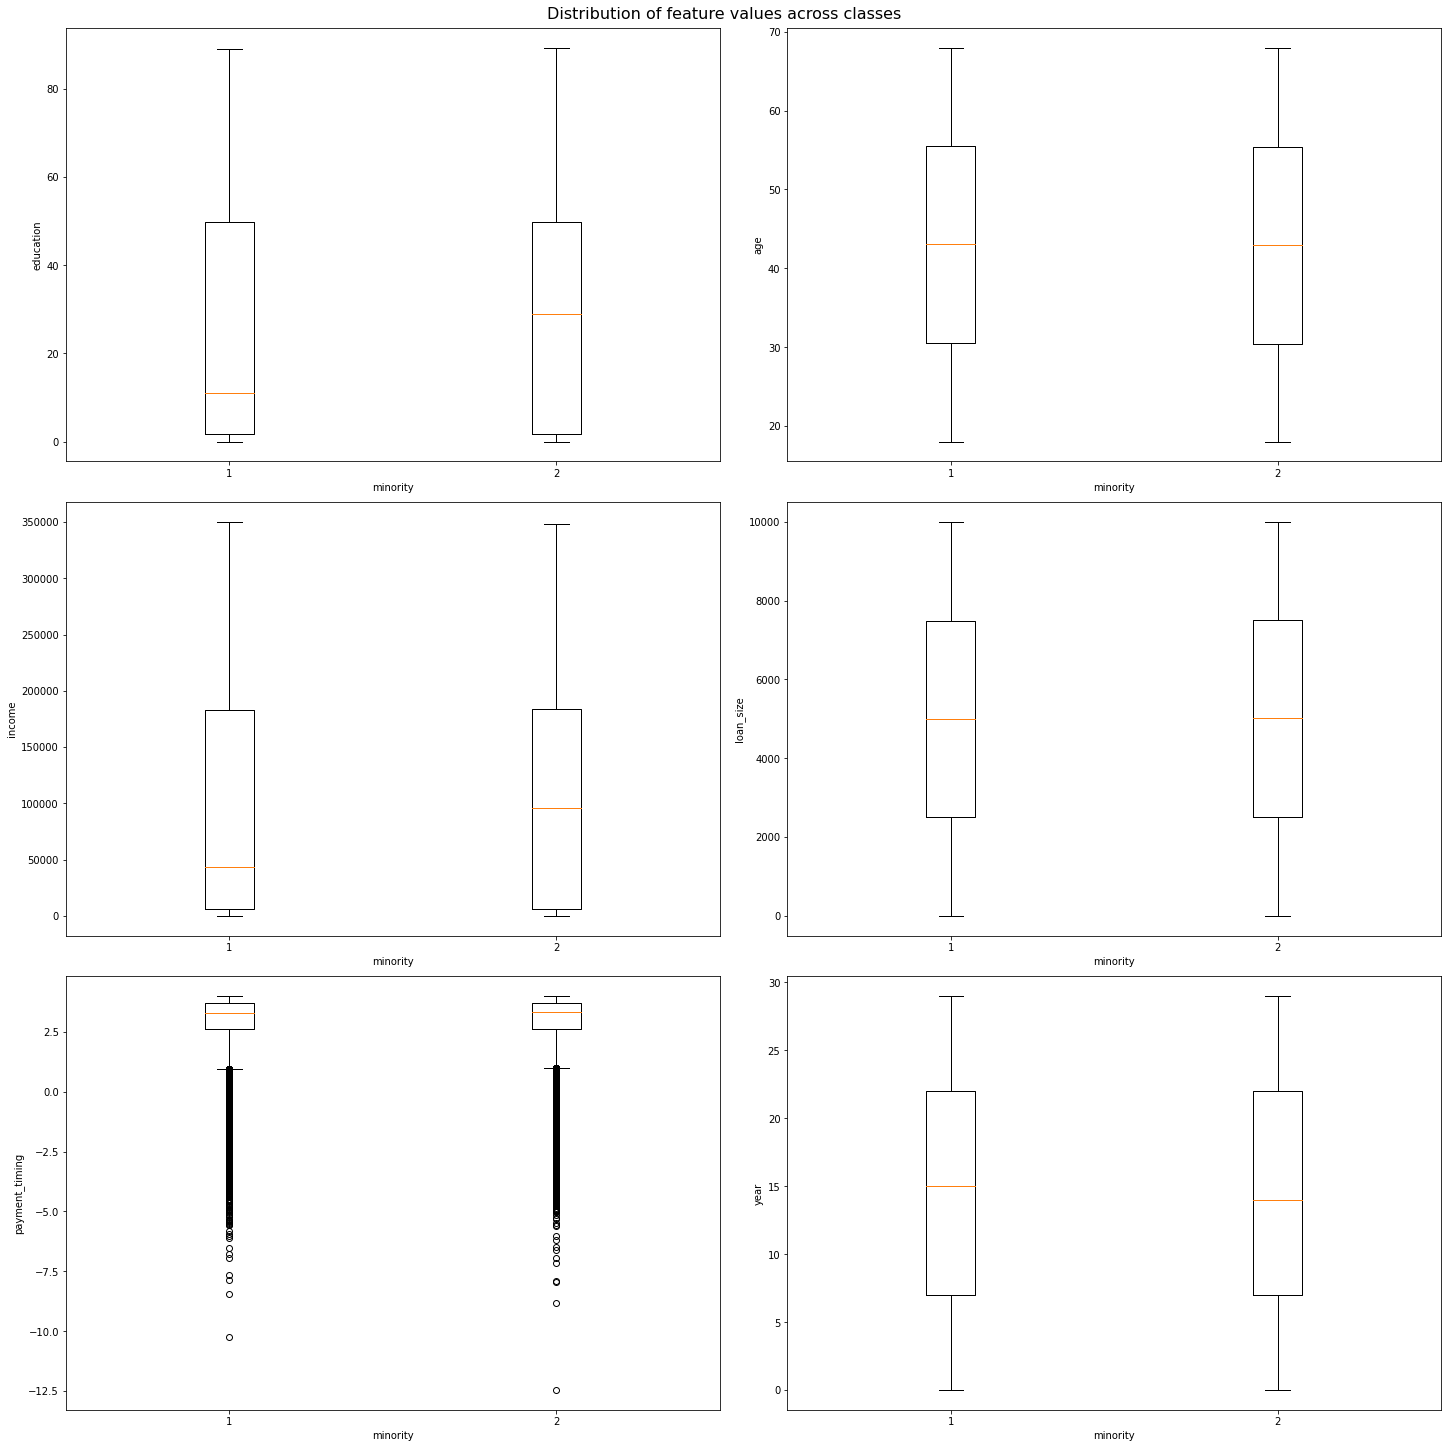

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define number of columns and rows
nrows = int(len(numeric_features)/2)
ncols = 2

# Create figure
fig, axes = plt.subplots(nrows, ncols, figsize=(20,20), constrained_layout=True)
fig.suptitle("Distribution of feature values across classes", fontsize=16)

# Iterate over axes (subfigures)
for idx, ax in enumerate(axes.flatten()):
    
    # Create list of feature values per class
    feature_by_class = [
        (loan_dataset.loc[loan_dataset["minority"]==c]
         [numeric_features[idx]].values)
        for c in set(loan_dataset["minority"])
    ]
        
    # Create boxplot
    ax.boxplot(feature_by_class)
    #sns.violinplot(feature_by_class)
    # sns.violinplot(
    #     x="minority", y=numeric_features[idx], data=loan_dataset, ax=ax
    # )
    
    # Set labels
    ax.set_xlabel("minority")
    ax.set_ylabel(f"{numeric_features[idx]}")

plt.show()

In [13]:
loan_dataset.groupby("minority").mean()

,sex,rent,education,age,income,loan_size,payment_timing,year,job_stability,default
minority,,,,,,,,,,
0,0.500115,0.051864,26.004133,43.005323,96153.156204,5001.262974,2.998046,14.502538,89.863856,0.001453
1,0.499885,0.898705,26.039383,42.968505,96294.198185,5008.746145,3.001442,14.497459,2.061528,0.998937


In [14]:
loan_dataset.groupby("sex").mean()

,minority,rent,education,age,income,loan_size,payment_timing,year,job_stability,default
sex,,,,,,,,,,
0,0.499767,0.475471,50.036632,42.990822,185027.923071,4999.810394,3.001940,14.5,45.997575,0.500000
1,0.499538,0.474508,2.006860,42.983031,7419.333176,5010.193518,2.997546,14.5,45.988904,0.499696


In [15]:
loan_dataset.groupby(["minority", "sex"]).mean()

rent  education        age         income    loan_size  \
minority sex                                                               
0        0    0.051443  50.010942  42.984577  184921.567800  5001.018280   
         1    0.052285   2.008317  43.026059    7425.392529  5001.507555   
1        0    0.899895  50.062345  42.997074  185134.377652  4998.601379   
         1    0.897514   2.005400  42.939924    7413.262603  5018.895565   

              payment_timing       year  job_stability   default  
minority sex                                                      
0        0          3.000592  14.501982      89.882467  0.001358  
         1          2.995500  14.503093      89.845254  0.001549  
1        0          3.003289  14.498016       2.071705  0.999108  
         1          2.999595  14.496901       2.051346  0.998766

In [22]:
loan_dataset["minority"].value_counts()

0    240167
1    239833
Name: minority, dtype: int64

In [23]:
loan_dataset["sex"].value_counts()

0    240000
1    240000
Name: sex, dtype: int64